In [198]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError, Accuracy

#### Data Preparation

In [199]:
dataset = pd.read_csv(filepath_or_buffer="train.csv")
dataset.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [200]:
dataset.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [201]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [202]:
dataset.isnull().any()

v.id             False
on road old      False
on road now      False
years            False
km               False
rating           False
condition        False
economy          False
top speed        False
hp               False
torque           False
current price    False
dtype: bool

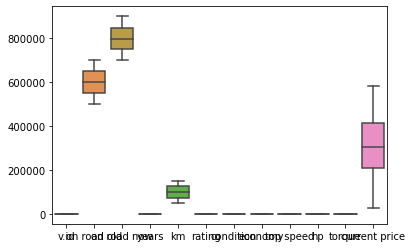

In [203]:
sns.boxplot(data=dataset);

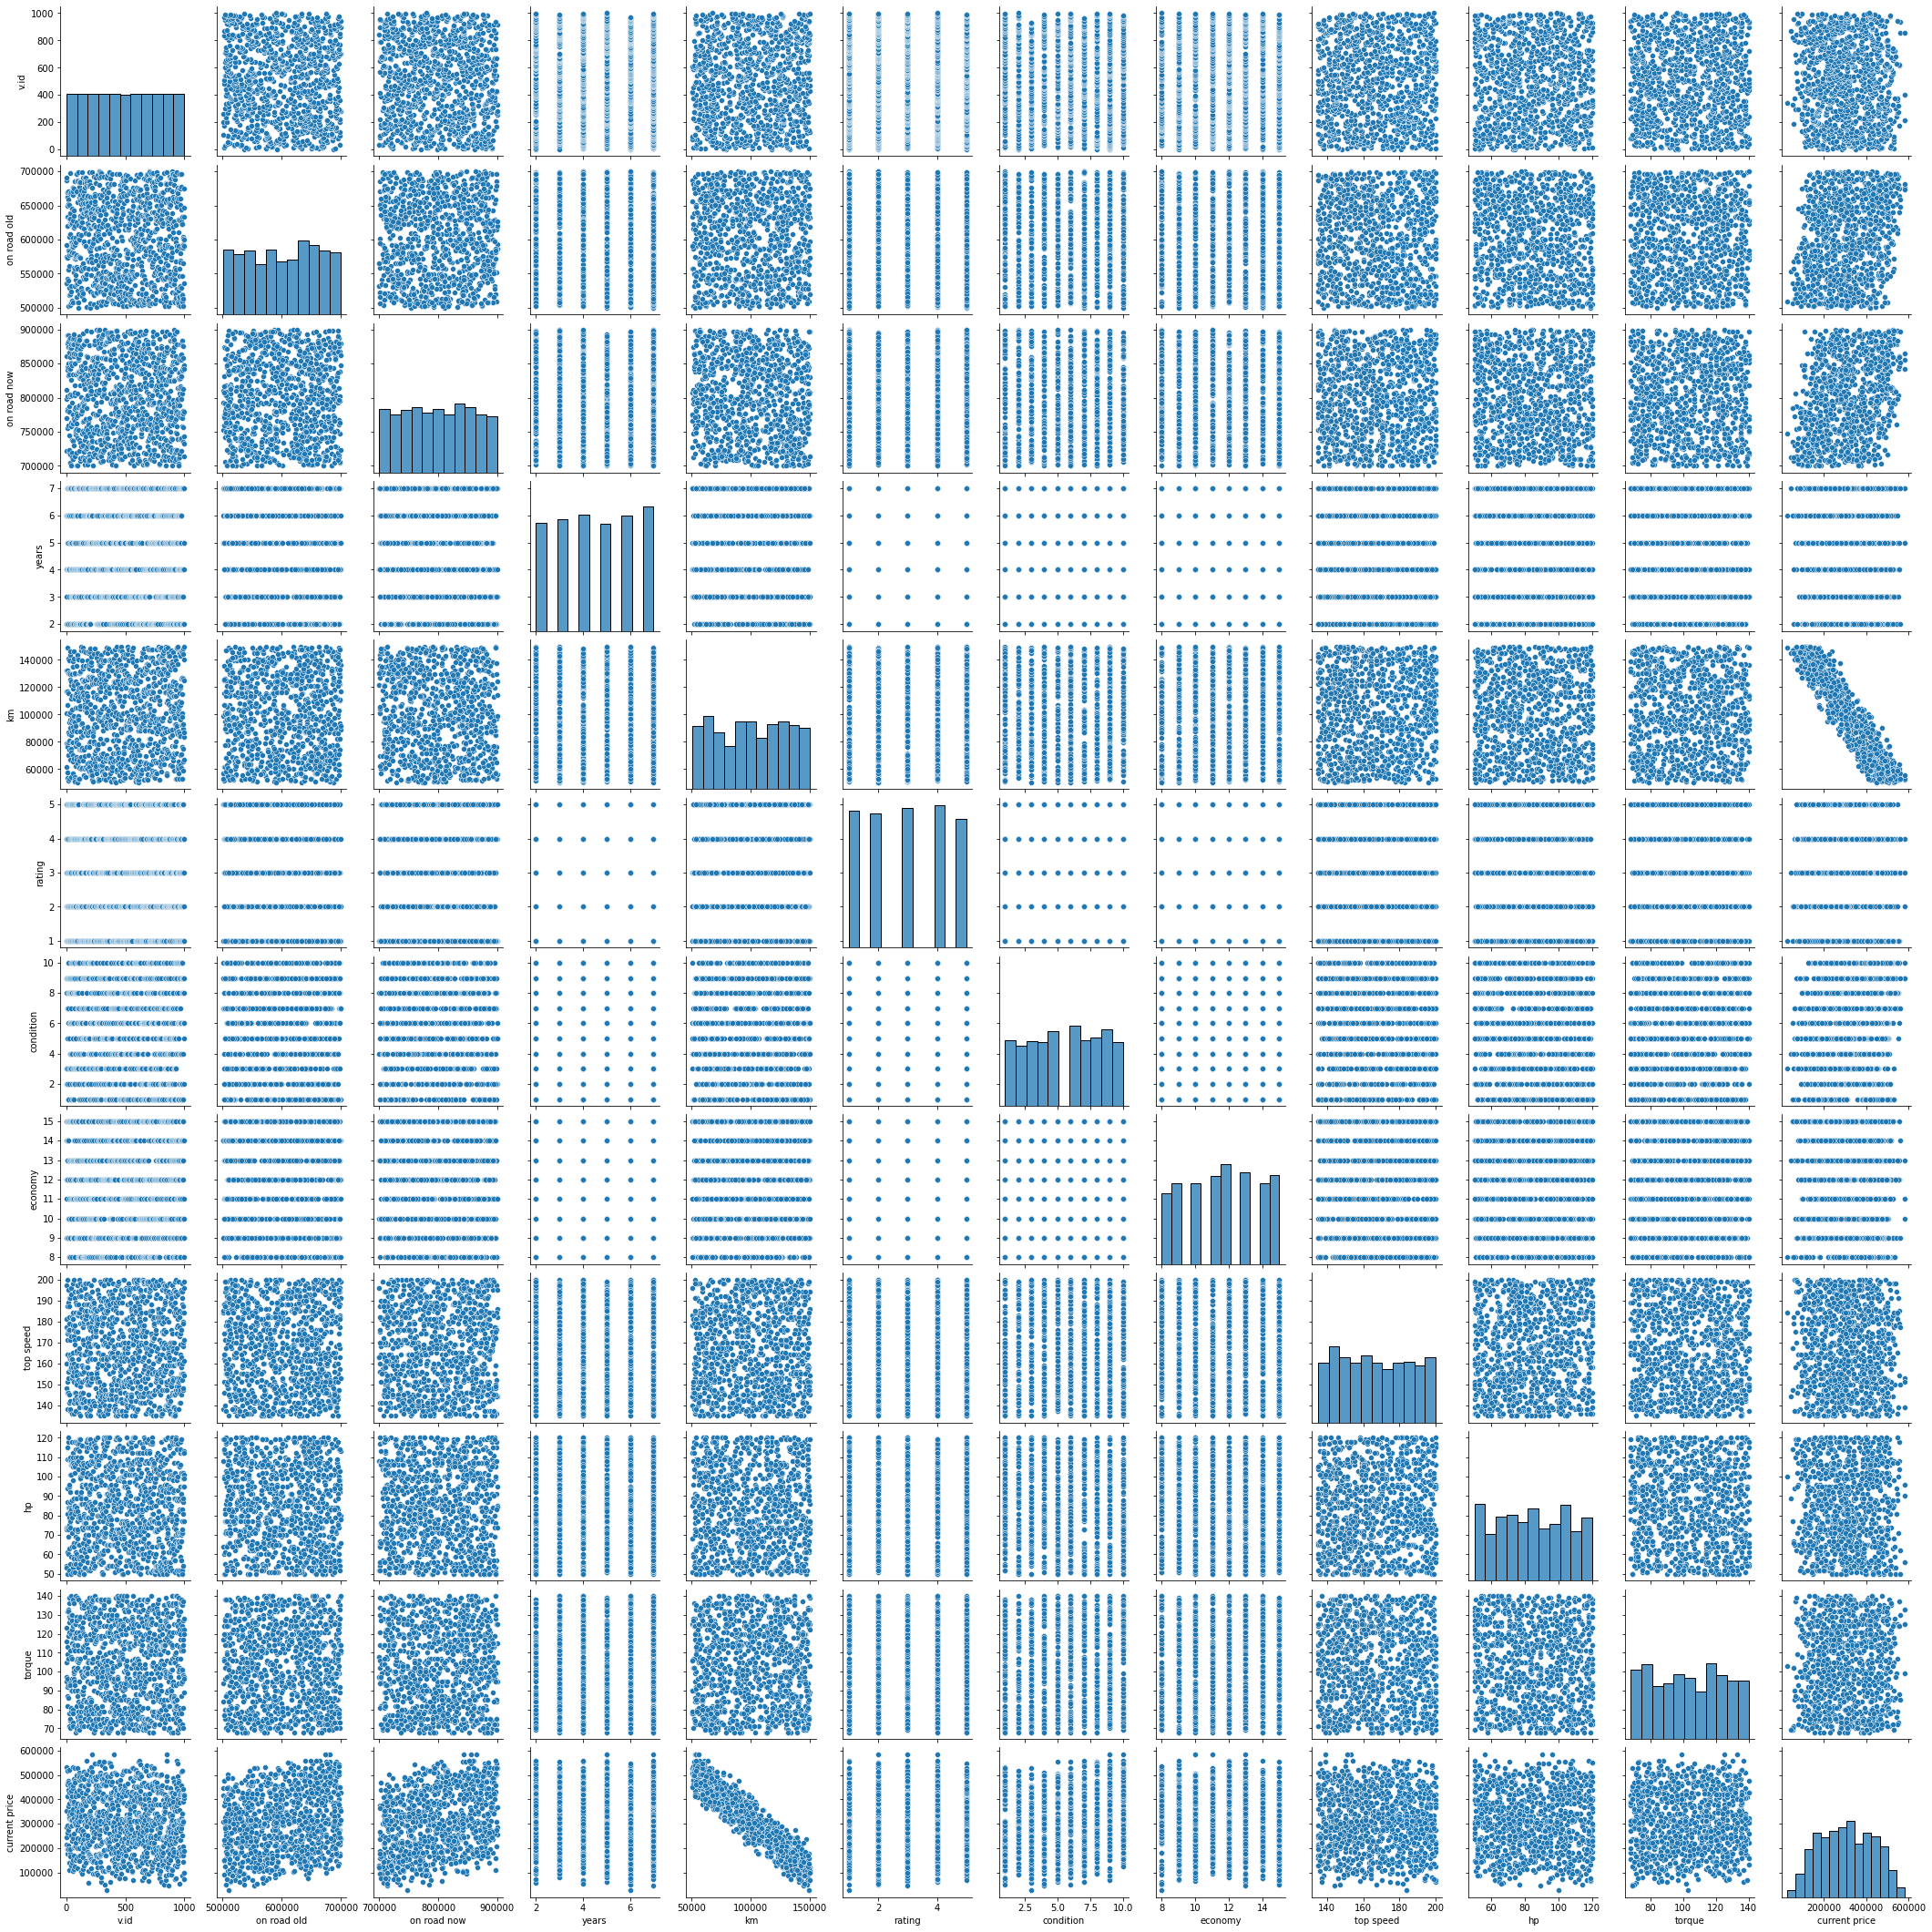

In [204]:
sns.pairplot(data=dataset);

In [205]:
tensor_data = tf.constant(value=dataset)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float64)


In [206]:
tensor_data.shape

TensorShape([1000, 12])

In [207]:
tensor_data = tf.cast(x=tensor_data, dtype=tf.float32)
tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]], dtype=float32)>

In [208]:
tensor_data = tf.random.shuffle(value=tensor_data)
tensor_data[:5]

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[8.720000e+02, 6.606650e+05, 8.429670e+05, 4.000000e+00,
        8.815300e+04, 3.000000e+00, 1.000000e+00, 9.000000e+00,
        1.520000e+02, 1.150000e+02, 1.350000e+02, 3.990555e+05],
       [8.260000e+02, 5.061150e+05, 7.850620e+05, 6.000000e+00,
        1.471290e+05, 2.000000e+00, 1.000000e+00, 1.500000e+01,
        1.670000e+02, 7.700000e+01, 7.000000e+01, 5.347050e+04],
       [4.400000e+02, 6.139750e+05, 8.141260e+05, 7.000000e+00,
        7.197700e+04, 5.000000e+00, 3.000000e+00, 1.500000e+01,
        1.600000e+02, 7.200000e+01, 1.230000e+02, 4.197130e+05],
       [5.790000e+02, 6.872460e+05, 7.877540e+05, 2.000000e+00,
        1.267600e+05, 5.000000e+00, 4.000000e+00, 9.000000e+00,
        1.650000e+02, 5.600000e+01, 9.800000e+01, 2.327185e+05],
       [5.170000e+02, 6.154090e+05, 8.817380e+05, 4.000000e+00,
        1.440100e+05, 5.000000e+00, 1.000000e+01, 1.400000e+01,
        1.880000e+02, 9.100000e+01, 1.270000e+02, 2

#### Set the dependent and independent variables

In [209]:
X = tensor_data[:, 3:-1]
print(X.shape)

y = tensor_data[:, -1]
y = tf.expand_dims(input=y, axis=-1)
print(y.shape)

(1000, 8)
(1000, 1)


#### Set the train, validation and test datas 

In [210]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [211]:
X_train = X[:int(DATASET_SIZE * TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE * TRAIN_RATIO)]
print(X_train.shape, y_train.shape)

(800, 8) (800, 1)


In [212]:
X_val = X[int(DATASET_SIZE * TRAIN_RATIO):int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO))]
y_val = y[int(DATASET_SIZE * TRAIN_RATIO):int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO))]
print(X_val.shape, y_val.shape)

(100, 8) (100, 1)


In [213]:
X_test = X[int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO)):]
y_test = y[int(DATASET_SIZE * (TRAIN_RATIO + VAL_RATIO)):]
print(X_test.shape, y_test.shape)

(100, 8) (100, 1)


#### Shuffle the dataset

In [214]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [215]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [216]:
for x, y in train_dataset:
    print(x, y)
    break

tf.Tensor(
[[6.00000e+00 1.47129e+05 2.00000e+00 1.00000e+00 1.50000e+01 1.67000e+02
  7.70000e+01 7.00000e+01]
 [4.00000e+00 1.06209e+05 3.00000e+00 1.00000e+00 1.20000e+01 1.84000e+02
  8.90000e+01 1.08000e+02]
 [4.00000e+00 8.81530e+04 3.00000e+00 1.00000e+00 9.00000e+00 1.52000e+02
  1.15000e+02 1.35000e+02]
 [7.00000e+00 8.34870e+04 4.00000e+00 5.00000e+00 1.00000e+01 1.41000e+02
  6.20000e+01 7.90000e+01]
 [3.00000e+00 1.41554e+05 1.00000e+00 1.00000e+01 1.40000e+01 1.78000e+02
  7.40000e+01 9.50000e+01]
 [3.00000e+00 8.76980e+04 2.00000e+00 1.00000e+00 9.00000e+00 1.39000e+02
  9.60000e+01 9.90000e+01]
 [4.00000e+00 1.44010e+05 5.00000e+00 1.00000e+01 1.40000e+01 1.88000e+02
  9.10000e+01 1.27000e+02]
 [7.00000e+00 1.42292e+05 4.00000e+00 1.00000e+00 1.20000e+01 1.35000e+02
  7.50000e+01 1.09000e+02]
 [7.00000e+00 1.37660e+05 2.00000e+00 1.00000e+01 1.40000e+01 1.89000e+02
  9.60000e+01 1.11000e+02]
 [2.00000e+00 8.81250e+04 1.00000e+00 1.00000e+01 1.20000e+01 1.70000e+02
  1.04

#### We have to normalization on the dataset

In [217]:
normalizer = Normalization()
normalizer.adapt(data=X_train)
normalizer(X_train)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.34694532, -0.42461216,  0.03211855, -1.6203852 , -1.1722074 ,
        -0.7957314 ,  1.5081348 ,  1.4861262 ],
       [ 0.8241796 ,  1.605036  , -0.6816257 , -1.6203852 ,  1.5135198 ,
        -0.01534668, -0.36586043, -1.591229  ],
       [ 1.4097421 , -0.98130625,  1.4596071 , -0.91298646,  1.5135198 ,
        -0.37952623, -0.61243874,  0.917999  ],
       [-1.5180702 ,  0.9040407 ,  1.4596071 , -0.55928713, -1.1722074 ,
        -0.11939798, -1.4014894 , -0.2655991 ],
       [-0.34694532,  1.4976963 ,  1.4596071 ,  1.5629089 ,  1.0658985 ,
         1.077192  ,  0.32455888,  1.1073748 ]], dtype=float32)>

#### Set up the model

In [218]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(8,)),    
    normalizer,
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(1)
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_17 (Dense)            (None, 128)               1152      
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dense_20 (Dense)            (None, 1)                 129       
                                                                 
Total params: 34322 (134.07 KB)
Trainable params: 34305 (134.00 KB)
Non-trainable params: 17 (72.00 Byte)
______________

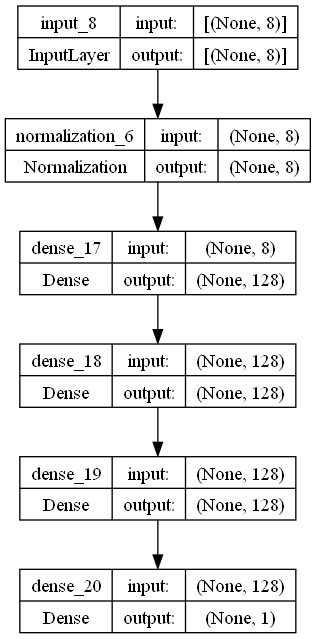

In [219]:
tf.keras.utils.plot_model(model=model, to_file="model.png", show_shapes=True)

In [220]:
model.compile(loss=MeanAbsoluteError(), 
              optimizer=Adam(learning_rate=0.1),
              metrics=[RootMeanSquaredError(), Accuracy()])

In [221]:
history = model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=100, verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 6ms/step - loss: 151544.4531 - root_mean_squared_error: 201462.7031 - accuracy: 0.0000e+00 - val_loss: 77549.2578 - val_root_mean_squared_error: 96089.1484 - val_accuracy: 0.0000e+00
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 55425.1016 - root_mean_squared_error: 70106.9453 - accuracy: 0.0000e+00 - val_loss: 44783.5469 - val_root_mean_squared_error: 55410.3672 - val_accuracy: 0.0000e+00
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 47972.4805 - root_mean_squared_error: 59175.0000 - accuracy: 0.0000e+00 - val_loss: 46442.1094 - val_root_mean_squared_error: 57713.6250 - val_accuracy: 0.0000e+00
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 43423.9102 - root_mean_squared_error: 53608.8203 - accuracy: 0.0000e+00 - val_loss: 44236.0938 - val_root_mean_squared_error: 54495.2461 - val_accuracy: 0.0000e+00
Epoch 5/100
25/25 [==============================]

In [222]:
#history.history

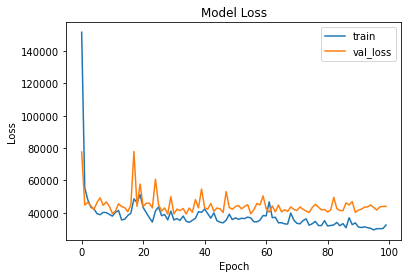

In [223]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "val_loss"])
plt.show();

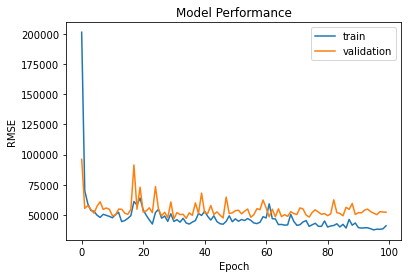

In [224]:
plt.plot(history.history["root_mean_squared_error"])
plt.plot(history.history["val_root_mean_squared_error"])
plt.title("Model Performance")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend(["train", "validation"])
plt.show();

In [225]:
model.evaluate(x=X_test, y=y_test)

4/4 [==============================] - 0s 2ms/step - loss: 42609.3945 - root_mean_squared_error: 51285.1680 - accuracy: 0.0000e+00


[42609.39453125, 51285.16796875, 0.0]

In [226]:
model.predict(tf.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 44ms/step


array([[386104.2]], dtype=float32)

In [227]:
y_true = list(y_test[:,0].numpy())

In [228]:
y_pred = list(model.predict(X_test)[:, 0])

4/4 [==============================] - 0s 997us/step


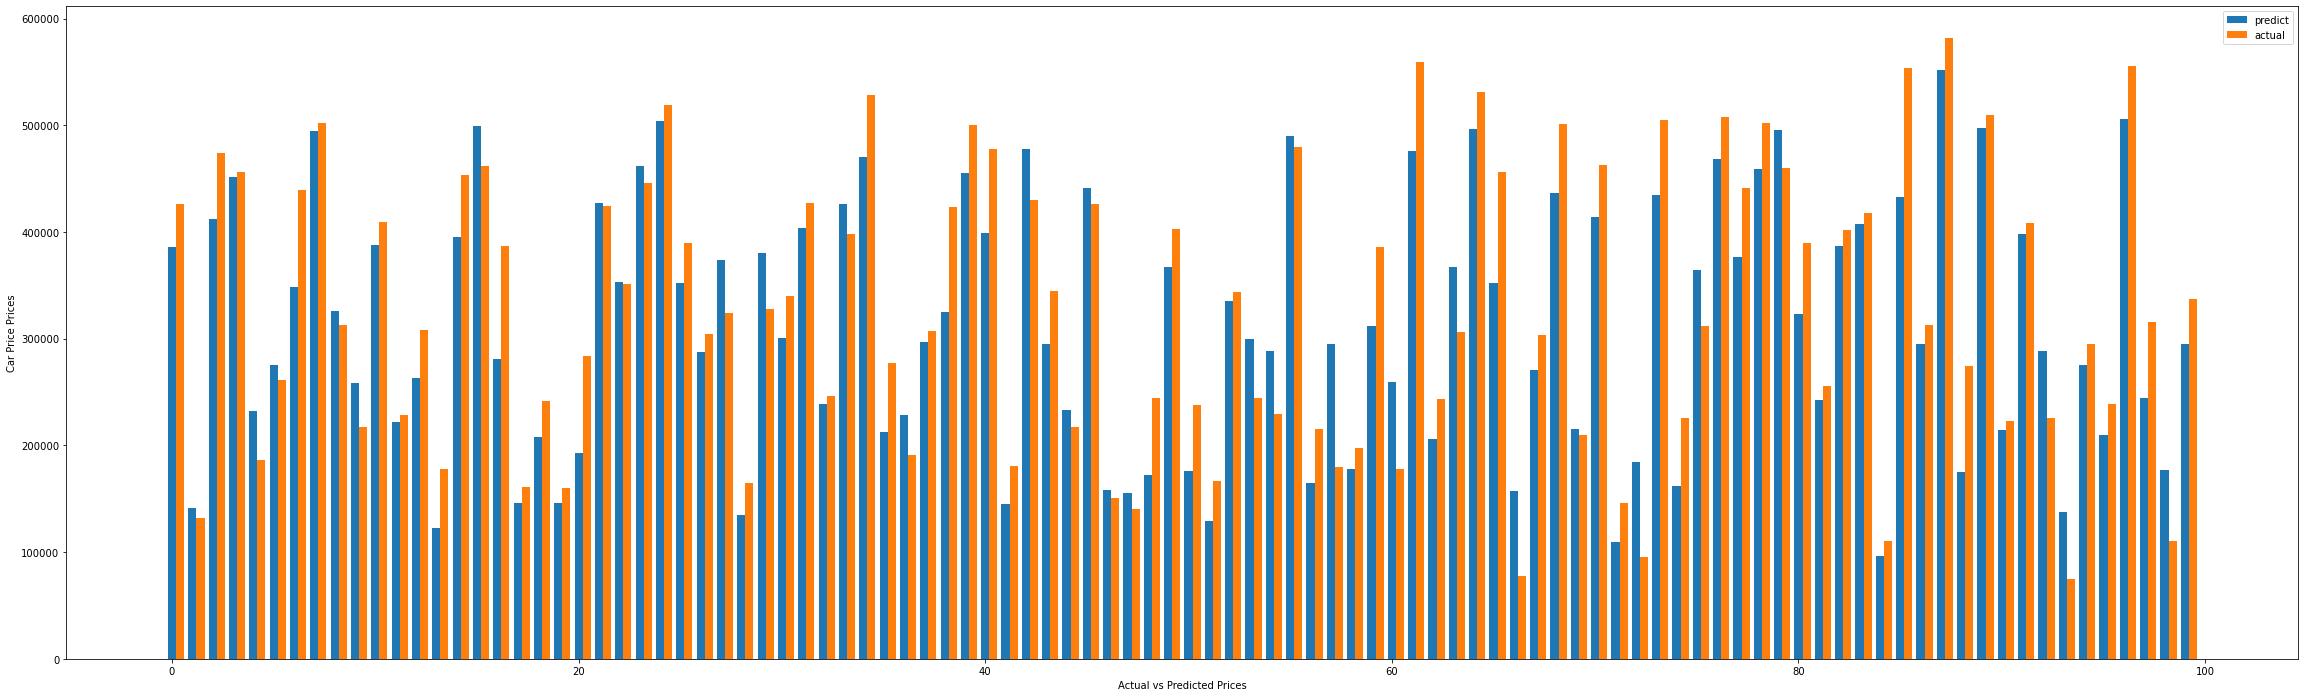

In [229]:
ind = np.arange(100)
plt.figure(figsize=(40, 12))

width = 0.4

plt.bar(ind, y_pred, width, label="Predicted Car Price")
plt.bar(ind + width, y_true, width, label="Actual Car Price")

plt.legend(["predict", "actual"])
plt.xlabel("Actual vs Predicted Prices")
plt.ylabel("Car Price Prices")
plt.show();

In [230]:
df = pd.DataFrame({
    "predict": y_pred[:5],
    "actual": np.ravel(y_test)[:5]
})
df

,predict,actual
0,386104.218750,425960.0
1,141047.734375,131893.5
2,412323.218750,474562.5
3,451809.312500,456154.5
4,232303.312500,186308.0


In [250]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=100, verbose=1)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 31619.2129 - root_mean_squared_error: 39792.9375 - accuracy: 0.0000e+00 - val_loss: 45223.7344 - val_root_mean_squared_error: 53490.3633 - val_accuracy: 0.0000e+00
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 30348.6641 - root_mean_squared_error: 38954.7812 - accuracy: 0.0000e+00 - val_loss: 42546.5352 - val_root_mean_squared_error: 51821.4570 - val_accuracy: 0.0000e+00
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 31767.6094 - root_mean_squared_error: 41213.9297 - accuracy: 0.0000e+00 - val_loss: 43333.6250 - val_root_mean_squared_error: 53466.9375 - val_accuracy: 0.0000e+00
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 32109.5059 - root_mean_squared_error: 40927.2812 - accuracy: 0.0000e+00 - val_loss: 42650.2461 - val_root_mean_squared_error: 50523.8555 - val_accuracy: 0.0000e+00
Epoch 5/100
25/25 [==============================] -

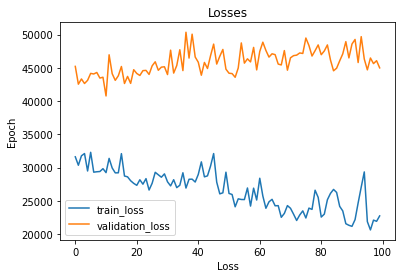

In [258]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Losses")
plt.xlabel("Loss")
plt.ylabel("Epoch")
plt.legend(["train_loss", "validation_loss"])

In [254]:
?plt.plot

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

In [249]:
?model.fit

Signature:
model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
Docstring:
Trains the model for a fixed number of epochs (dataset iterations).

Args:
    x: Input data. It could be:
      - A Numpy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
      - A TensorFlow tensor, or a list of tensors
        (in case the model has multiple inputs).
      - A dict mapping input names to the corresponding array/tensors,
        if the model has named inputs.
      - A `tf.data` dataset. Should return a tuple
        of either `(inputs, targets)` or
        `(inputs, targets, sample_w

In [232]:
?tf.keras.metrics.Accuracy

Init signature: tf.keras.metrics.Accuracy(name='accuracy', dtype=None)
Docstring:     
Calculates how often predictions equal labels.

This metric creates two local variables, `total` and `count` that are used
to compute the frequency with which `y_pred` matches `y_true`. This
frequency is ultimately returned as `binary accuracy`: an idempotent
operation that simply divides `total` by `count`.

If `sample_weight` is `None`, weights default to 1.
Use `sample_weight` of 0 to mask values.

Args:
  name: (Optional) string name of the metric instance.
  dtype: (Optional) data type of the metric result.

Standalone usage:

>>> m = tf.keras.metrics.Accuracy()
>>> m.update_state([[1], [2], [3], [4]], [[0], [2], [3], [4]])
>>> m.result().numpy()
0.75

>>> m.reset_state()
>>> m.update_state([[1], [2], [3], [4]], [[0], [2], [3], [4]],
...                sample_weight=[1, 1, 0, 0])
>>> m.result().numpy()
0.5

Usage with `compile()` API:

```python
model.compile(optimizer='sgd',
              loss=

In [233]:
?plt.bar

Signature:
plt.bar(
    x,
    height,
    width=0.8,
    bottom=None,
    *,
    align='center',
    data=None,
    **kwargs,
)
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *height* and *width*. The vertical baseline
is *bottom* (default 0).

Many parameters can take either a single value applying to all bars
or a sequence of values, one for each bar.

Parameters
----------
x : float or array-like
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : float or array-like
    The height(s) of the bars.

width : float or array-like, default: 0.8
    The width(s) of the bars.

bottom : float or array-like, default: 0
    The y coordinate(s) of the bars bases.

align : {'center', 'edge'}, default: 'center'
    Alignment of the bars to the *x* coordinates:

    - 'center': Center the base on the *x* positions.
    - 'edge': Align the left edges of the bars 

In [234]:
?model.predict

Signature:
model.predict(
    x,
    batch_size=None,
    verbose='auto',
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
Docstring:
Generates output predictions for the input samples.

Computation is done in batches. This method is designed for batch
processing of large numbers of inputs. It is not intended for use inside
of loops that iterate over your data and process small numbers of inputs
at a time.

For small numbers of inputs that fit in one batch,
directly use `__call__()` for faster execution, e.g.,
`model(x)`, or `model(x, training=False)` if you have layers such as
`tf.keras.layers.BatchNormalization` that behave differently during
inference. You may pair the individual model call with a `tf.function`
for additional performance inside your inner loop.
If you need access to numpy array values instead of tensors after your
model call, you can use `tensor.numpy()` to get the numpy array value of
an eager tensor.

Also,

In [235]:
?model.evaluate

Signature:
model.evaluate(
    x=None,
    y=None,
    batch_size=None,
    verbose='auto',
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
    **kwargs,
)
Docstring:
Returns the loss value & metrics values for the model in test mode.

Computation is done in batches (see the `batch_size` arg.)

Args:
    x: Input data. It could be:
      - A Numpy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
      - A TensorFlow tensor, or a list of tensors
        (in case the model has multiple inputs).
      - A dict mapping input names to the corresponding array/tensors,
        if the model has named inputs.
      - A `tf.data` dataset. Should return a tuple
        of either `(inputs, targets)` or
        `(inputs, targets, sample_weights)`.
      - A generator or `keras.utils.Sequence` returning `(inputs,
        targets)` or `(inputs, targets, sa

In [236]:
?model.fit

Signature:
model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
Docstring:
Trains the model for a fixed number of epochs (dataset iterations).

Args:
    x: Input data. It could be:
      - A Numpy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
      - A TensorFlow tensor, or a list of tensors
        (in case the model has multiple inputs).
      - A dict mapping input names to the corresponding array/tensors,
        if the model has named inputs.
      - A `tf.data` dataset. Should return a tuple
        of either `(inputs, targets)` or
        `(inputs, targets, sample_w

In [237]:
?model.compile

Signature:
model.compile(
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    pss_evaluation_shards=0,
    **kwargs,
)
Docstring:
Configures the model for training.

Example:

```python
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])
```

Args:
    optimizer: String (name of optimizer) or optimizer instance. See
      `tf.keras.optimizers`.
    loss: Loss function. May be a string (name of loss function), or
      a `tf.keras.losses.Loss` instance. See `tf.keras.losses`. A loss
      function is any callable with the signature `loss = fn(y_true,
      y_pred)`, where `y_true` are the ground truth values, and
      `y_pred` are the model's predictions.
      `y_t

In [238]:
?tf.keras.utils.plot_model

Signature:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False,
)
Docstring:
Converts a Keras model to dot format and save to a file.

Example:

```python
input = tf.keras.Input(shape=(100,), dtype='int32', name='input')
x = tf.keras.layers.Embedding(
    output_dim=512, input_dim=10000, input_length=100)(input)
x = tf.keras.layers.LSTM(32)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)
model = tf.keras.Model(inputs=[input], outputs=[output])
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)
```

Args:
  model: A Keras model instanc

In [239]:
?Dense

Init signature:
Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Docstring:     
Just your regular densely-connected NN layer.

`Dense` implements the operation:
`output = activation(dot(input, kernel) + bias)`
where `activation` is the element-wise activation function
passed as the `activation` argument, `kernel` is a weights matrix
created by the layer, and `bias` is a bias vector created by the layer
(only applicable if `use_bias` is `True`). These are all attributes of
`Dense`.

Note: If the input to the layer has a rank greater than 2, then `Dense`
computes the dot product between the `inputs` and the `kernel` along the
last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
For example, if input has dimensions `(batch_size, d0

In [240]:
?tf.keras.Sequential

Init signature: tf.keras.Sequential(layers=None, name=None)
Docstring:     
`Sequential` groups a linear stack of layers into a `tf.keras.Model`.

`Sequential` provides training and inference features on this model.

Examples:

```python
# Optionally, the first layer can receive an `input_shape` argument:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))

# This is identical to the following:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(8))

# Note that you can also omit the `input_shape` argument.
# In that case the model doesn't have any weights until the first call
# to a training/evaluation method (since it isn't yet built):
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(4))
# model.weights not created yet

# Whereas if you specify the input shape, the model ge

In [241]:
?normalizer.adapt

Signature: normalizer.adapt(data, batch_size=None, steps=None)
Docstring:
Computes the mean and variance of values in a dataset.

Calling `adapt()` on a `Normalization` layer is an alternative to
passing in `mean` and `variance` arguments during layer construction. A
`Normalization` layer should always either be adapted over a dataset or
passed `mean` and `variance`.

During `adapt()`, the layer will compute a `mean` and `variance`
separately for each position in each axis specified by the `axis`
argument. To calculate a single `mean` and `variance` over the input
data, simply pass `axis=None`.

In order to make `Normalization` efficient in any distribution context,
the computed mean and variance are kept static with respect to any
compiled `tf.Graph`s that call the layer. As a consequence, if the layer
is adapted a second time, any models using the layer should be
re-compiled. For more information see
`tf.keras.layers.experimental.preprocessing.PreprocessingLayer.adapt`.

`adapt()` is

In [242]:
?Normalization

Init signature: Normalization(axis=-1, mean=None, variance=None, invert=False, **kwargs)
Docstring:     
A preprocessing layer which normalizes continuous features.

This layer will shift and scale inputs into a distribution centered around
0 with standard deviation 1. It accomplishes this by precomputing the mean
and variance of the data, and calling `(input - mean) / sqrt(var)` at
runtime.

The mean and variance values for the layer must be either supplied on
construction or learned via `adapt()`. `adapt()` will compute the mean and
variance of the data and store them as the layer's weights. `adapt()` should
be called before `fit()`, `evaluate()`, or `predict()`.

For an overview and full list of preprocessing layers, see the preprocessing
[guide](https://www.tensorflow.org/guide/keras/preprocessing_layers).

Args:
    axis: Integer, tuple of integers, or None. The axis or axes that should
      have a separate mean and variance for each index in the shape. For
      example, if shap

In [243]:
?tf.expand_dims

Signature: tf.expand_dims(input, axis, name=None)
Docstring:
Returns a tensor with a length 1 axis inserted at index `axis`.

Given a tensor `input`, this operation inserts a dimension of length 1 at the
dimension index `axis` of `input`'s shape. The dimension index follows Python
indexing rules: It's zero-based, a negative index it is counted backward
from the end.

This operation is useful to:

* Add an outer "batch" dimension to a single element.
* Align axes for broadcasting.
* To add an inner vector length axis to a tensor of scalars.

For example:

If you have a single image of shape `[height, width, channels]`:

>>> image = tf.zeros([10,10,3])

You can add an outer `batch` axis by passing `axis=0`:

>>> tf.expand_dims(image, axis=0).shape.as_list()
[1, 10, 10, 3]

The new axis location matches Python `list.insert(axis, 1)`:

>>> tf.expand_dims(image, axis=1).shape.as_list()
[10, 1, 10, 3]

Following standard Python indexing rules, a negative `axis` counts from the
end so `axis=-

In [244]:
?tf.random.shuffle

Signature: tf.random.shuffle(value, seed=None, name=None)
Docstring:
Randomly shuffles a tensor along its first dimension.

The tensor is shuffled along dimension 0, such that each `value[j]` is mapped
to one and only one `output[i]`. For example, a mapping that might occur for a
3x2 tensor is:

```python
[[1, 2],       [[5, 6],
 [3, 4],  ==>   [1, 2],
 [5, 6]]        [3, 4]]
```

Args:
  value: A Tensor to be shuffled.
  seed: A Python integer. Used to create a random seed for the distribution.
    See
    `tf.random.set_seed`
    for behavior.
  name: A name for the operation (optional).

Returns:
  A tensor of same shape and type as `value`, shuffled along its first
  dimension.
File:      c:\users\murat\anaconda3\lib\site-packages\tensorflow\python\ops\random_ops.py
Type:      function


In [245]:
?tf.cast

Signature: tf.cast(x, dtype, name=None)
Docstring:
Casts a tensor to a new type.

The operation casts `x` (in case of `Tensor`) or `x.values`
(in case of `SparseTensor` or `IndexedSlices`) to `dtype`.

For example:

>>> x = tf.constant([1.8, 2.2], dtype=tf.float32)
>>> tf.cast(x, tf.int32)
<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>

Notice `tf.cast` has an alias `tf.dtypes.cast`:

>>> x = tf.constant([1.8, 2.2], dtype=tf.float32)
>>> tf.dtypes.cast(x, tf.int32)
<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>

The operation supports data types (for `x` and `dtype`) of
`uint8`, `uint16`, `uint32`, `uint64`, `int8`, `int16`, `int32`, `int64`,
`float16`, `float32`, `float64`, `complex64`, `complex128`, `bfloat16`.
In case of casting from complex types (`complex64`, `complex128`) to real
types, only the real part of `x` is returned. In case of casting from real
types to complex types (`complex64`, `complex128`), the imaginary part of the
re